'''
=================================================
Program ini dibuat untuk melakukan automatisasi pengolahan (cleaning) data text yang berguna untuk pemodelan model analisa sentimen serta visualisasi dari data tersebut.
=================================================
'''

## IDENTIFIKASI MASALAH

TOPIK : MENGETAHUI FAKTOR PENYEBAB DIABETES DARI PERSEBARAN DATA

PROBLEM STATEMENT : Diabetes merupakan penyakit kronis(jangka panjang) yang mempengaruhi kemampuan tubuh dalam menggunakan energi yang dimakan, penyakit ini sudah terjadi pada jutaan orang diseluruh dunia. Prediksi diabetes adaalah upaya profesional kesehatan untuk mengidentifikasi individu(pasien) yang berisiko tinggi terkena penyakit diabetes sehingga langkah - langkah pencegahan dapat diambil dengan lebih efektif guna menganalisis faktor - faktor yang berhubungan dengan diabetes pada individu(pasien) berdasarkan data kesehatan.

 METODE SMART
    
    - SPESIFIC : Untuk mengurangi penyakit diabetes pada individu berdasarkan data riwayat medis.

    - MEASUREABLE : Untuk mengurangi individu yang terkena penyakit diabetes mencapai 70%

    - ACHIEVEABLE : Mengetahui faktor - faktor yang dapat mengurangi penyakit diabetes pada setiap individu

    - RELEVANT : Hasil prediksi data diabetes akan bermanfaat bagi profesional kesehatan guna merancang rencana pengelolaan penyakit yang lebih efektif untuk masyarakat. Informasi ini akan    meningkatkan pemahaman masyarakat tentang faktor - faktor yang menyebabkan penyakit diabetes.
    
    - TIME BOUND : Proyek ini akan berjalan selama satu tahun untuk mengidentifikasi individu dengan risiko tinggi terkena diabetes. Setelah itu, dalam lima tahun pertama setelah implementasi, tujuannya adalah mengurangi jumlah individu yang terkena penyakit diabetes mencapai 70%.

5W + 1 H

    - WHAT : Apakah faktor hypertensi dapat mempengaruhi seseorang terkena penyakit diabetes ?
    - WHEN :  Diumur berapa orang mulai terkena diabetes ?
    - WHERE : Dimana letak tingkat gula darah untuk orang dinyatakan diabetes ?
    - WHO : Siapa saja yang lebih berpontensi memiliki penyakit diabetes ?
    - WHY : Mengapa diabetes dipengaruhi oleh faktor merokok ?
    - WHAT : Apakah ada hubungan antara gender dan smoking history?

In [22]:
# Mengimport beberapa package
import pandas as pd
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Supaya memudahkan langsung ke link data set
driver = webdriver.Chrome()
#Link DataSet
url='https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset'
driver.get(url)
html = driver.page_source

soup = BeautifulSoup(html, "html.parser")
print(soup.prettify()[:700])

<html lang="en">
 <head>
  <title>
   Diabetes prediction dataset
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow" name="robots"/>
  <meta content="A Comprehensive Dataset for Predicting Diabetes with Medical &amp; Demographic Data" name="description"/>
  <meta content="no-cache" name="turbolinks-cache-control"/>
  <meta content="health,classification,diabetes,healthcare,binary classification" name="keywords"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0" name="viewport"/>
  <meta content="#008ABC" name="theme-color"/>
  <script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.lb.en.AOzoyjtjrhQ.O/


# Data Loading

In [3]:
# Load dataset bertipe csv, lalu menduplikasinya agar file asli tidak acak saat cleaning
df = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes = df.copy()

Dibawah ini merupakan eksplorasi data

In [4]:
# Beberapa sample data untuk mengeksplor datanya
diabetes.sample(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
60444,Male,29.0,0,0,never,25.38,6.2,85,0
67927,Female,33.0,0,0,No Info,27.32,3.5,159,0
17592,Female,72.0,0,0,not current,26.21,6.2,80,0
17504,Male,22.0,0,0,never,35.57,4.0,155,0
27450,Female,28.0,0,0,No Info,27.32,6.5,159,0
...,...,...,...,...,...,...,...,...,...
51132,Female,43.0,0,0,current,27.32,6.2,158,0
19034,Male,54.0,0,1,former,36.63,5.7,300,1
59007,Male,48.0,0,0,No Info,27.32,4.5,145,0
97993,Female,27.0,0,0,never,29.55,6.1,155,0


In [5]:
diabetes.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
diabetes.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# Mengubah tipe data age menjadi integer
diabetes['age'] = diabetes['age'].astype(int)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


In [9]:
diabetes.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
87586,Female,54,0,0,never,23.60,6.1,130,0
71082,Female,62,1,0,never,42.17,6.2,160,0
70071,Male,34,0,0,No Info,27.32,5.0,140,0
47092,Female,51,0,0,former,27.32,4.5,145,0
18929,Female,22,0,0,No Info,27.32,4.5,130,0
12503,Female,36,0,0,never,22.05,6.2,158,0
39380,Male,69,1,0,never,29.39,6.6,126,0
21761,Female,13,0,0,No Info,18.70,5.0,155,0
47135,Female,31,0,0,never,27.32,5.7,80,0
30381,Female,45,0,0,current,28.62,6.1,159,0


In [10]:
# Mengubah isi kolom smoking_history dengan value No Info menjadi NaN
diabetes['smoking_history'].replace('No Info', pd.NA, inplace=True)

In [11]:
# Menghapus value NaN
diabetes = diabetes.dropna()
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
5,Female,20,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26,0,0,never,34.34,6.5,160,0
99993,Female,40,0,0,never,40.69,3.5,155,0
99997,Male,66,0,0,former,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


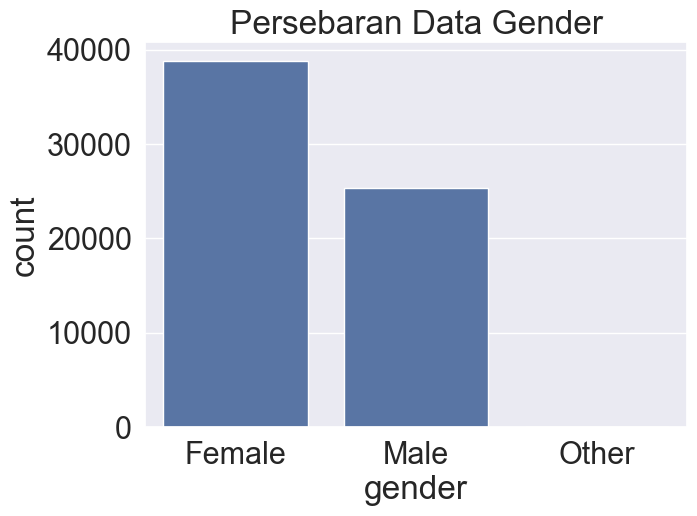

In [12]:
# Import beberapa package untuk mem visualisasikan data
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Persebaran Data Gender
plt.figure(figsize=(7,5))
sns.set(font_scale=2)
sns.countplot(x='gender',data=diabetes);
plt.title("Persebaran Data Gender");

In [13]:
# Jumlah masing - value pada kolom gender
diabetes.gender.value_counts()

gender
Female    38852
Male      25320
Other        12
Name: count, dtype: int64

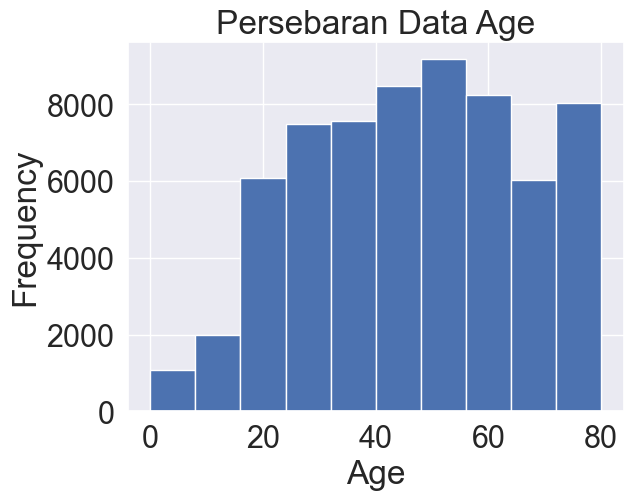

In [14]:
# Visualisasi Persebaran Data Age
plt.hist(diabetes['age']);
plt.title('Persebaran Data Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

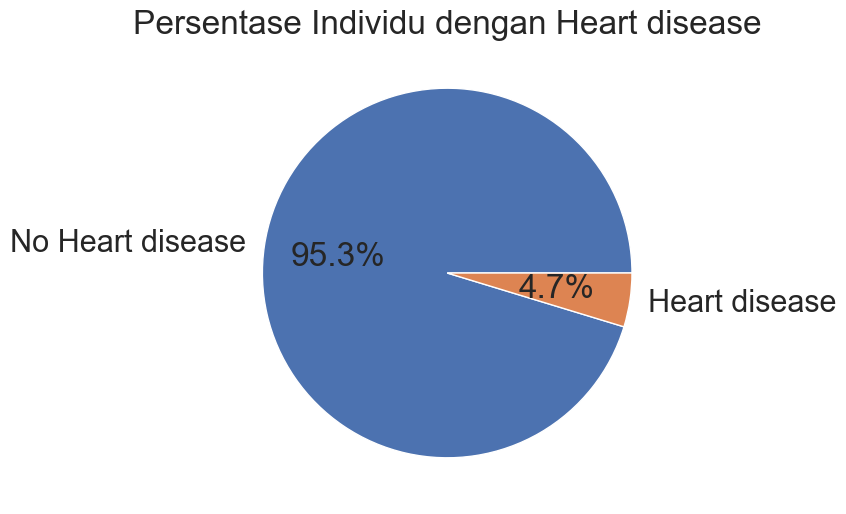

In [15]:
# Visualisasi persentase Heart Disease
heart_disease_counts = diabetes['heart_disease'].value_counts()

heart_disease_percentage = heart_disease_counts / len(diabetes) * 100

plt.figure(figsize=(10,6))
labels = ['No Heart disease', 'Heart disease']
plt.pie(heart_disease_percentage, labels=labels, autopct='%1.1f%%')

plt.title('Persentase Individu dengan Heart disease')

plt.show()

In [16]:
# Pada dataset 0 = No dan 1 = Yes
# Jumlah masing - masing value pada kolom heart_disease 
diabetes.heart_disease.value_counts()

heart_disease
0    61165
1     3019
Name: count, dtype: int64

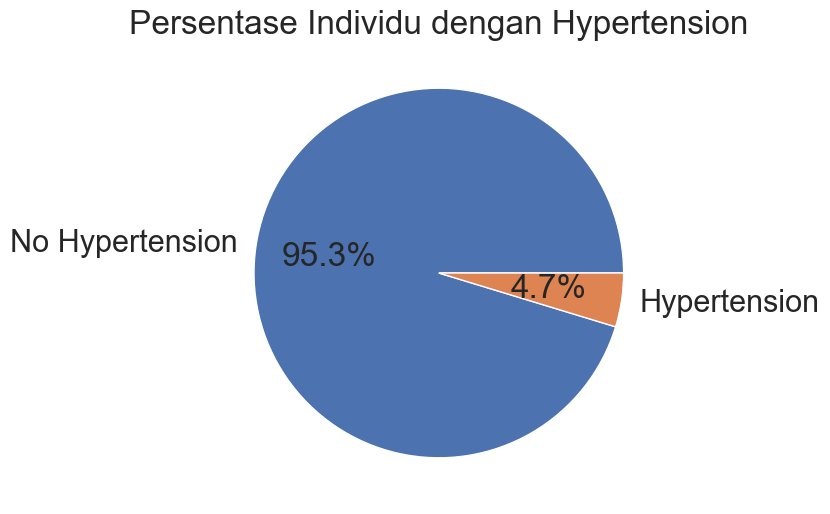

In [17]:
# Visualisasi persentase Hypertension

hypertension_counts = diabetes['hypertension'].value_counts()

hypertension_percentage = heart_disease_counts / len(diabetes) * 100

plt.figure(figsize=(10,6))
labels = ['No Hypertension', 'Hypertension']
plt.pie(hypertension_percentage, labels=labels, autopct='%1.1f%%')

plt.title('Persentase Individu dengan Hypertension')

plt.show()

In [18]:
# Pada dataset 0 = No dan 1 = Yes
# Jumlah masing - masing value pada kolom hypertension 
diabetes.hypertension.value_counts()

hypertension
0    57901
1     6283
Name: count, dtype: int64

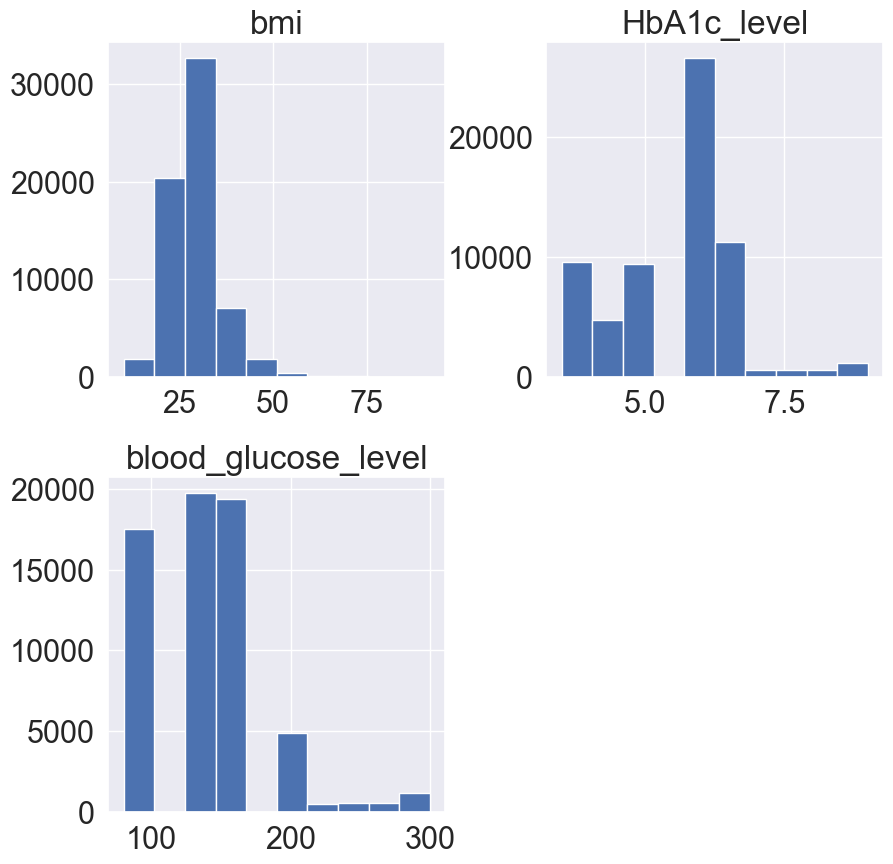

In [19]:
diabetes[['bmi','HbA1c_level','blood_glucose_level']].hist(figsize=(10,10))
plt.show()

# WHAT : Apakah faktor hypertensi dapat mempengaruhi seseorang terkena diabetes ?

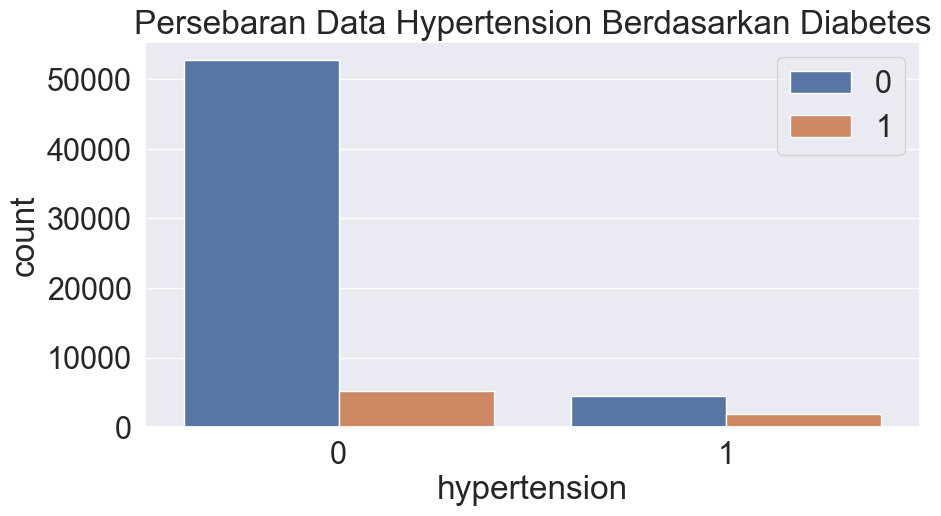

In [20]:
plt.figure(figsize=(10,5));
sns.set(font_scale=2)
sns.countplot(x='hypertension',data=diabetes,hue='diabetes');
plt.legend(loc="upper right");
plt.title("Persebaran Data Hypertension Berdasarkan Diabetes");

0 = No dan 1 = Yes
Kesimpulan : Seperti yang dilihat pada Bar Chart, bisa disimpulkan ketika sesorang memiliki hypertension belum tentu individu tersebut terkena diabetes dan Seseorang tanpa hypertension bisa saja diabetes karena disebabkan oleh faktor lain.

# WHY : Mengapa diabetes dipengaruhi oleh faktor merokok?

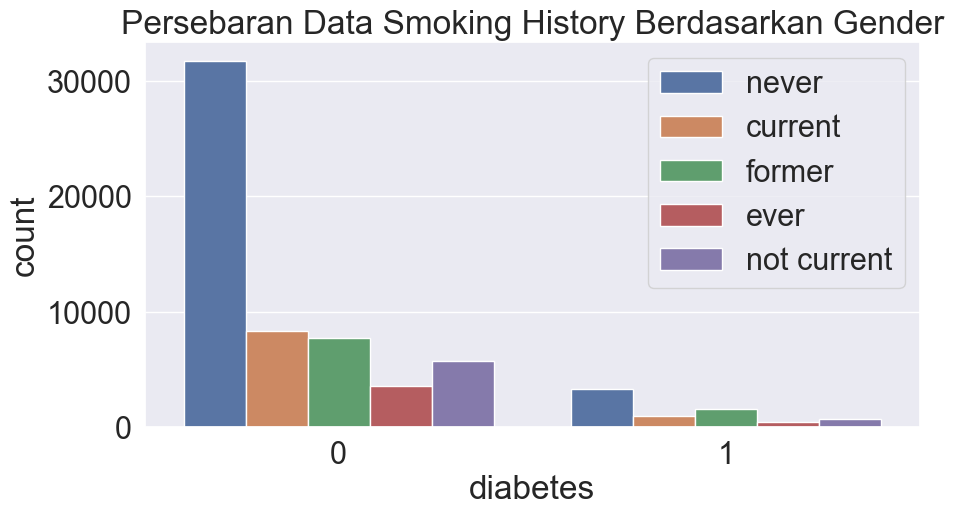

In [24]:
plt.figure(figsize=(10,5));
sns.set(font_scale=2)
sns.countplot(x='diabetes',data=diabetes,hue='smoking_history');
plt.legend(loc="upper right");
plt.title("Persebaran Data Smoking History Berdasarkan Gender");

0 = No dan 1 = Yes
Kesimpulan : Seperti yang dilihat pada Bar Chart, bisa disimpulkan ketika sesorang yang terkena penyakit diabetes justru pada orang yang tidak pernah merokok

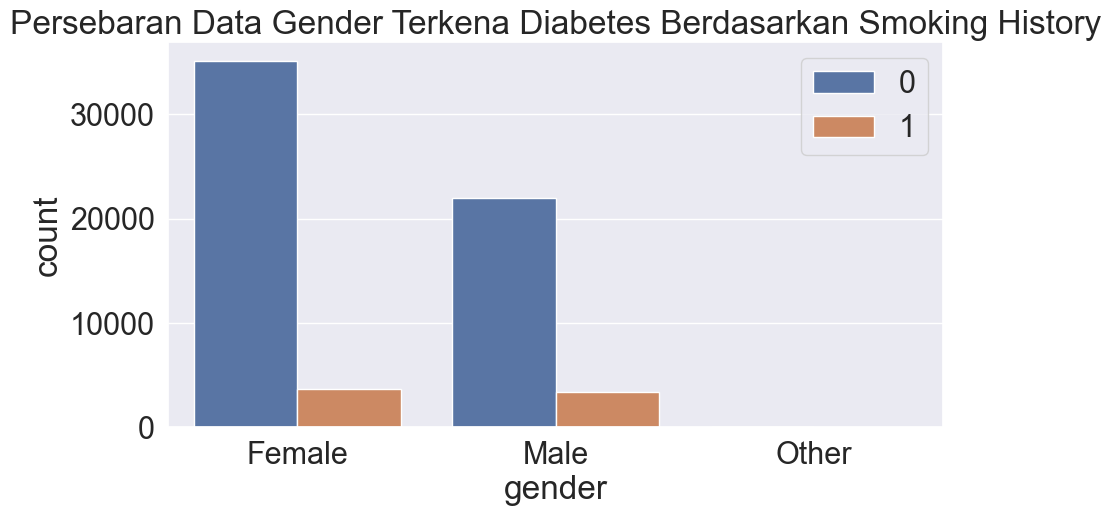

In [25]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender',data=diabetes,hue='diabetes');
plt.legend(loc="upper right");
plt.title("Persebaran Data Gender Terkena Diabetes Berdasarkan Smoking History");

# WHO : Siapa saja yang lebih berpotensi memiliki penyakit diabetes?

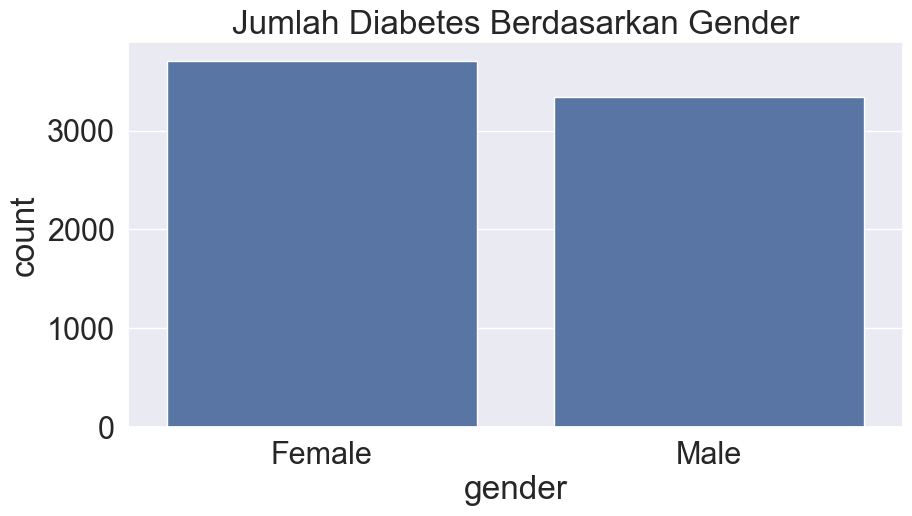

In [26]:
jmlh_diabet = diabetes[diabetes['diabetes'] == 1]
plt.figure(figsize=(10,5));
sns.countplot(x='gender', data=jmlh_diabet)
plt.title("Jumlah Diabetes Berdasarkan Gender");

Kesimpulan : Seperti yang di visualisasikan pada Bar Chart gender Female dan Male tidak jauh berbeda yang memiliki penyakit diabetes walau wanita masih lebih tinggi

# WHERE : Dimana letak tingkat gula darah untuk orang yang dinyatakan diabetes ?

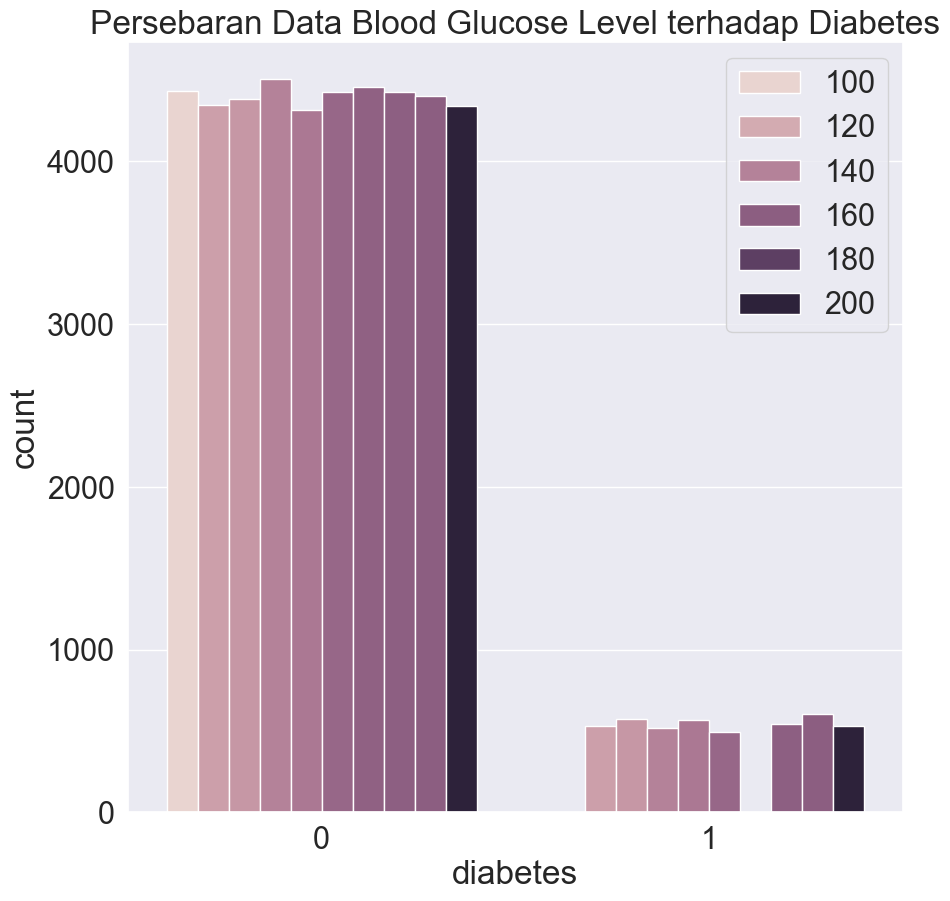

In [27]:
glucose_filter = diabetes[(diabetes['blood_glucose_level'] >= 100) & (diabetes['blood_glucose_level'] <= 200)]

plt.figure(figsize=(10,10));
sns.set(font_scale=2)
sns.countplot(x='diabetes',data=glucose_filter,hue='blood_glucose_level');
plt.legend(loc="upper right");
plt.title("Persebaran Data Blood Glucose Level terhadap Diabetes");
plt.show()

Seperti yang sudah saya baca pada beberapa artikel seseorang dengan diabetes diklasifikasikan menjadi 3 berdasarkan gula darah seperti :
- Normal :  < 100mg/dL
- Prediabetes : 100mg/dL - 126mg/dL
- Diabetes : > 126mg/dL

Kesimpulan : Berdasarkan pada Chart diatas orang yang punya penyakit diabetes belum tentu gula darahnya rendah 

# Statistik Deskriptif

In [28]:
print('Rata - rata BMI sekitar :',diabetes['bmi'].mean())
print('Nilai tengah BMI sekitar :',diabetes['bmi'].median())
print('Modus BMI sekitar :',diabetes['bmi'].mode().values[0])
print('Variance BMI sekitar :',diabetes['bmi'].var())
print('Standar Deviasi BMI sekitar :',diabetes['bmi'].std())

Rata - rata BMI sekitar : 28.424120029913997
Nilai tengah BMI sekitar : 27.32
Modus BMI sekitar : 27.32
Variance BMI sekitar : 42.46085237678653
Standar Deviasi BMI sekitar : 6.516199227831093


In [29]:
print(f"Skewness: {diabetes['bmi'].skew()}")
print(f"Kurtosis: {diabetes['bmi'].kurtosis()}")

Skewness: 1.2627701312928643
Kurtosis: 3.5196262716184012


<Axes: >

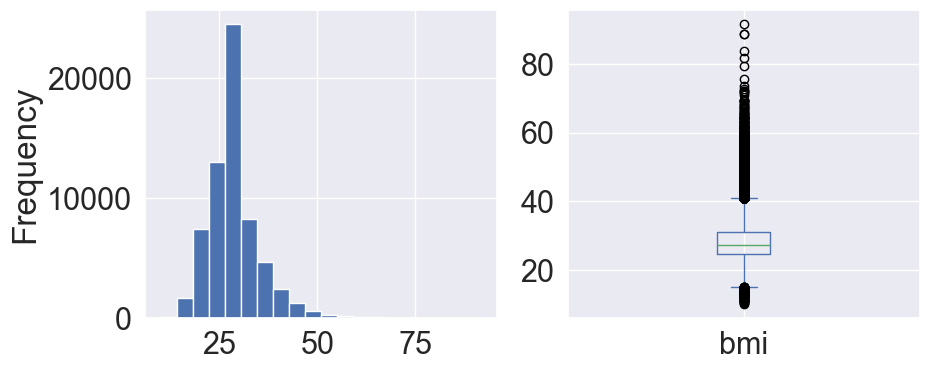

In [30]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

diabetes['bmi'].plot(kind='hist',bins=20,ax=ax[0])
diabetes['bmi'].plot(kind='box',ax=ax[1])

Dapat disimpulkan pada kolom bmi memiliki outlier

Tukey's Rule

In [31]:
# Menghitung nilai IQR
q1 = diabetes['bmi'].quantile(0.25)
q3 = diabetes['bmi'].quantile(0.75)
iqr = q3-q1

# Menghitung batas atas dan batas bawah
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 40.85
Lower Boundary: 14.85


In [32]:
outlier = diabetes['bmi'][(diabetes['bmi']<low_bound) | (diabetes['bmi']>up_bound)]
no_outlier = diabetes['bmi'][(diabetes['bmi']>=low_bound) & (diabetes['bmi']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(diabetes["bmi"]):.2f}%')

Percentage of outliers: 5.33%


<Axes: >

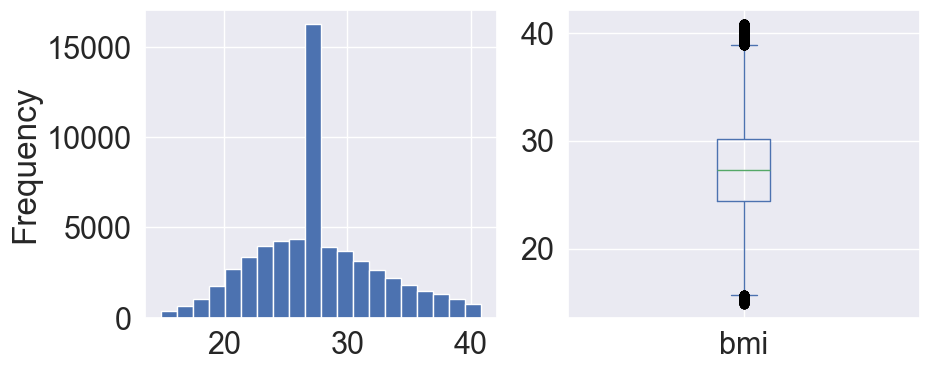

In [33]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

Kesimpulan : Dengan menggunakan Tukey Rule, outlier pada kolom bmi sudah dihilangkan

# Statistik Inferensial

WHAT : Apakah ada hubungan antara gender dan smoking history?
Untuk menjawab pertanyaan saya menggunakan metode chi-square
    Chi-Square Test

In [34]:
# mengimport package scipy
from scipy import stats
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
5,Female,20,0,0,never,27.32,6.6,85,0


In [35]:
# Mengganti value other pada kolom gender menjadi NAN
diabetes['gender'].replace('Other', pd.NA, inplace=True)

In [36]:
# Menghapus value NAN
diabetes = diabetes.dropna()
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
5,Female,20,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26,0,0,never,34.34,6.5,160,0
99993,Female,40,0,0,never,40.69,3.5,155,0
99997,Male,66,0,0,former,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


In [37]:
diabetes.to_csv('cleandiabetes.csv', index = False) # --> WAJIB PAKAI INDEX=FALSE SUPAYA INDEXNYA GAK IKUT, JANGAN SAMPAI KEJADIAN GC TERULANG
print("Berhasil Di EXPORT")

Berhasil Di EXPORT


In [38]:
#Contingency Table
contingency_table = pd.crosstab(diabetes['gender'],diabetes['smoking_history'])
contingency_table

smoking_history,current,ever,former,never,not current
gender,,,,,
Female,5058,2238,4774,22869,3913
Male,4228,1765,4578,12223,2526


In [39]:
# Menghitung p-value untuk mendapatkan kesimpulan dari H0 dan H1
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 5.522585794849746e-182


H1 = Tidak ada hubungan antara gender dengan smoking_history 

H0 = Ada hubungan antara gender dengan smoking_history


- p-value (5.522585794849746e-182):

P-value ini adalah angka yang sangat kecil, jauh < dari 0,05, maka dianggap signifikan secara statistik. Dengan kata lain, sangat tidak mungkin hubungan yang kita lihat hanyalah sebuah kebetulan. 

Kesimpulan :
Terdapat hubungan yang KUAT antara smoking_history dengan gender (male & female).

## KESIMPULAN KESELURUHAN
    * TERDAPAT FAKTOR YANG SANGAT BERPENGARUH TERHADAP PENYAKIT DIABETES

    * KETIKA BLOOD GLUCOSE SESEORANG DIATAS 160mg SESEORANG PASTI MEMILIKI PENYAKIT DIABETES

    * TERDAPAT SEDIKIT HUBUNGAN ANTARA BEBERAPA FAKTOR DENGAN DIABETES

    * TERDAPAT KETERKAITAN YANG CUKUP KUAT ANTARA RIWAYAT MEROKOK DENGAN GENDER